<a href="https://colab.research.google.com/github/4GeeksAcademy/Wiston_Travieso-Proyecto-de-Regresi-n-Log-stica/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler


In [29]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=413&path=bank-marketing-campaign-data.csv"

In [30]:
df = pd.read_csv(url, sep=";")

In [31]:
df = df.drop_duplicates().reset_index(drop=True)
print(df.shape)
df.head()

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [33]:
numericals = df.select_dtypes(include='number').columns

In [34]:
numericals

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [35]:
categorical = df.select_dtypes(include='object').columns

In [36]:
categorical

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [37]:
def eda_group(df, group, x):
  grupos = df[group].unique()
  g1, g2 = grupos[0], grupos[1]
  p = scipy.stats.ttest_ind(df.loc[df[group]==g1, x],
                        df.loc[df[group]==g2, x], equal_var=False ).pvalue
  return pd.DataFrame({'grupo':[g1,g2], 'media':[df.loc[df[group]==g1, x].mean() ,  df.loc[df[group]==g2, x].mean()], 'p':[p,x]})

In [38]:
for col in numericals:
  display(eda_group(df, 'y', col))
# Nota observemos en cuales variables hay un valor de P menor a 0.05 esto puede ser indicativo
# de que existen diferenias significativas entre le variable a considerar por ejemplo age y los grupos de interes (yes, no)

,grupo,media,p
0,no,39.910994,0.000002
1,yes,40.912266,age


,grupo,media,p
0,no,220.868079,0.0
1,yes,553.256090,duration


,grupo,media,p
0,no,2.633385,0.0
1,yes,2.051951,campaign


,grupo,media,p
0,no,984.109396,0.0
1,yes,791.990946,pdays


,grupo,media,p
0,no,0.132414,0.0
1,yes,0.492779,previous


,grupo,media,p
0,no,0.248885,0.0
1,yes,-1.233089,emp.var.rate


,grupo,media,p
0,no,93.603798,0.0
1,yes,93.354577,cons.price.idx


,grupo,media,p
0,no,-40.593232,0.0
1,yes,-39.791119,cons.conf.idx


,grupo,media,p
0,no,3.811482,0.0
1,yes,2.123362,euribor3m


,grupo,media,p
0,no,5176.165690,0.0
1,yes,5095.120069,nr.employed


In [39]:
df[numericals].corr() # podriamos considerar que una relacion fuerte es mayor de 35% esto no es absoluto solo es un valor conservador.. Luego quitamos dichas columnas

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


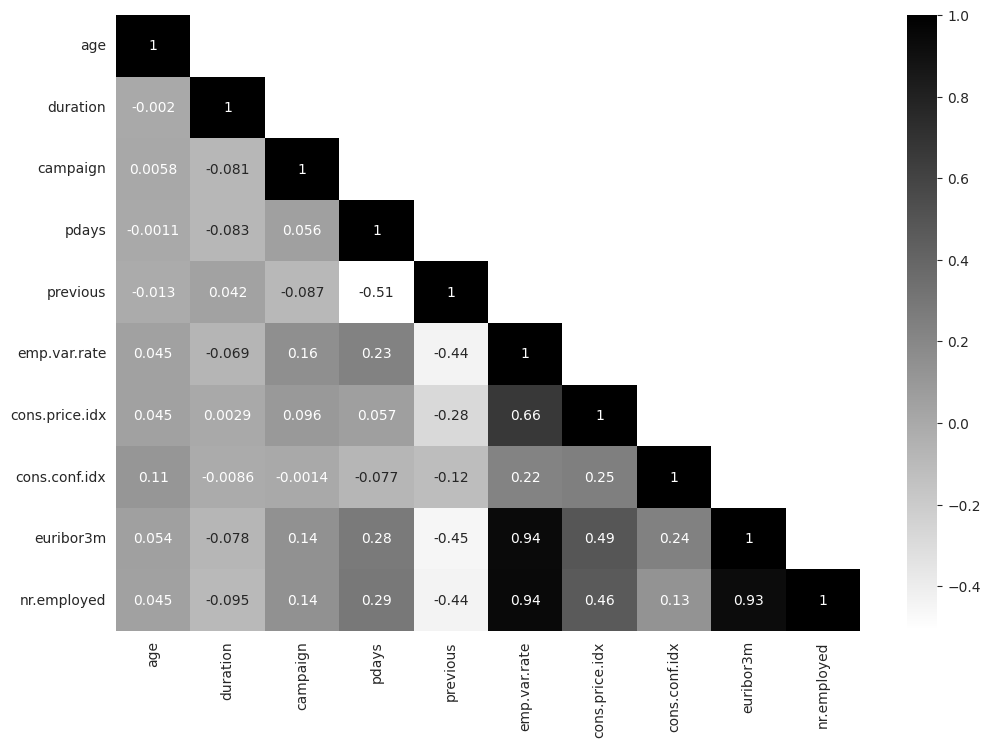

In [40]:
corrMatrix = df[numericals].corr(method='spearman')
import numpy as np
CorrMatrix = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(bool))
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(CorrMatrix, annot=True, cmap="gray_r")

In [41]:
numericals = numericals.drop(['cons.price.idx', 'cons.conf.idx']) # estas variables tienen una correlacion fuerte con otras
numericals

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [42]:

def tab_eda(df, group, x):
  tabla = pd.crosstab(df[group], df[x])
  p_val=  chi2_contingency(tabla).pvalue
  tabla = pd.concat([tabla, pd.DataFrame( p_val,columns=tabla.columns, index=["valor de p"])])
  return tabla.round(3)

def tab_eda_pct_col(df, group, x):
    tabla = pd.crosstab(df[group], df[x])

    p_val = chi2_contingency(tabla)[1]

    tabla_pct = tabla.div(tabla.sum(axis=0), axis=1) * 100
    tabla_pct.loc["valor de p"] = p_val

    return tabla_pct.round(2)


In [43]:
tab_eda(df, 'y', 'job')
# el valor de P  Es para la hipotesis nula de que son indepoendientes  la el grupo con la variable a considerar
# si el valor de P es mayor a 0.05 entonces son independientes
# si el valor de p es menor a 0.05 son dependientes que quiere decir que la probabilidad de pertencer a un grupo cambia con la variable de interes.

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
no,9068.0,8615.0,1332.0,954.0,2596.0,1284.0,1272.0,3644.0,600.0,6009.0,870.0,293.0
yes,1351.0,638.0,124.0,106.0,328.0,434.0,149.0,323.0,275.0,730.0,144.0,37.0
valor de p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
for x in categorical:
  display(tab_eda(df, 'y', x))

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
no,9068.0,8615.0,1332.0,954.0,2596.0,1284.0,1272.0,3644.0,600.0,6009.0,870.0,293.0
yes,1351.0,638.0,124.0,106.0,328.0,434.0,149.0,323.0,275.0,730.0,144.0,37.0
valor de p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


marital,divorced,married,single,unknown
no,4135.0,22390.0,9944.0,68.0
yes,476.0,2531.0,1620.0,12.0
valor de p,0.0,0.0,0.0,0.0


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
no,3748.0,2103.0,5572.0,8481.0,14.0,4645.0,10495.0,1479.0
yes,428.0,188.0,473.0,1031.0,4.0,595.0,1669.0,251.0
valor de p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


default,no,unknown,yes
no,28381.0,8153.0,3.0
yes,4196.0,443.0,0.0
valor de p,0.0,0.0,0.0


housing,no,unknown,yes
no,16590.000,883.000,19064.000
yes,2025.000,107.000,2507.000
valor de p,0.057,0.057,0.057


loan,no,unknown,yes
no,30089.000,883.000,5565.000
yes,3849.000,107.000,683.000
valor de p,0.577,0.577,0.577


contact,cellular,telephone
no,22283.0,14254.0
yes,3852.0,787.0
valor de p,0.0,0.0


month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
no,2092.0,5521.0,93.0,6521.0,4759.0,270.0,12881.0,3684.0,402.0,314.0
yes,539.0,655.0,89.0,648.0,559.0,276.0,886.0,416.0,315.0,256.0
valor de p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


day_of_week,fri,mon,thu,tue,wed
no,6980.0,7665.0,7574.0,7133.0,7185.0
yes,846.0,847.0,1044.0,953.0,949.0
valor de p,0.0,0.0,0.0,0.0,0.0


poutcome,failure,nonexistent,success
no,3647.0,32411.0,479.0
yes,605.0,3140.0,894.0
valor de p,0.0,0.0,0.0


y,no,yes
no,36537.0,0.0
yes,0.0,4639.0
valor de p,0.0,0.0


In [45]:
# Se eliminan las columnas loan y housing porque su valor p es mayor a 0.05

categorical = categorical.drop(['loan', 'housing'])
categorical

Index(['job', 'marital', 'education', 'default', 'contact', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [46]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [47]:
# Min-max scaler

# Factorizar

new_numerical_cols_names = []
for col in categorical:
  df[col+"_n"] = pd.factorize(df[col])[0]
  new_numerical_cols_names.append(col+"_n")

# Extend the numericals Index with the new column names
numericals = numericals.append(pd.Index(new_numerical_cols_names))

df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,y,job_n,marital_n,education_n,default_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,no,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,no,1,0,1,1,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,no,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,no,2,0,2,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,no,1,0,1,0,0,0,0,0,0


In [48]:
numericals

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'euribor3m', 'nr.employed', 'job_n', 'marital_n', 'education_n',
       'default_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n',
       'y_n'],
      dtype='object')

In [49]:
# MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[numericals])
df_scal = pd.DataFrame(scal_features, index = df.index, columns=numericals)
df_scal.head()

,age,duration,campaign,pdays,previous,emp.var.rate,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.957379,0.859735,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.957379,0.859735,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.957379,0.859735,0.090909,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.957379,0.859735,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.957379,0.859735,0.090909,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from re import X
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

X = df_scal.drop('y_n', axis=1)
y = df_scal['y_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support(indices=True)
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_train.columns[ix])

X_train_sel.head()


,previous,emp.var.rate,euribor3m,nr.employed,poutcome_n
0,0.0,1.000000,0.980730,1.000000,0.0
1,0.0,0.333333,0.138291,0.512287,0.0
2,0.0,0.937500,0.956926,0.859735,0.0
3,0.0,0.937500,0.957379,0.859735,0.0
4,0.0,0.333333,0.175924,0.512287,0.0


In [51]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("./data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("./data/processed/clean_test.csv", index=False)

Modelo de Regresión Logística

In [52]:
train_data = pd.read_csv("./data/processed/clean_train.csv")
test_data = pd.read_csv("./data/processed/clean_test.csv")

train_data.head()

,previous,emp.var.rate,euribor3m,nr.employed,poutcome_n,y_n
0,0.0,1.000000,0.980730,1.000000,0.0,0.0
1,0.0,0.333333,0.138291,0.512287,0.0,0.0
2,0.0,0.937500,0.956926,0.859735,0.0,0.0
3,0.0,0.937500,0.957379,0.859735,0.0,0.0
4,0.0,0.333333,0.175924,0.512287,0.0,0.0


In [53]:
X_train = train_data.drop('y_n', axis=1)
y_train = train_data['y_n']
X_test = test_data.drop('y_n', axis=1)
y_test = test_data['y_n']

In [ ]:
from sklearn.linear_model import LogisticRegression
